<a href="https://colab.research.google.com/github/Tfushimura/CS114.L21/blob/main/FinalProject/Colab/Training_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>CS114.L21 - MÁY HỌC - MACHINE LEARNING</b></h1>
<h1 align="center"><b>ĐỒ ÁN CUỐI KỲ - PHÁT HIỆN CHÁY THÔNG QUA HÌNH ẢNH</b></h1>
<h1 align="center"><b>TRAINING LOGISTIC REGRESSION</b></h1>

## **1. MÔ TẢ BÀI TOÁN**

### **1.1. MÔ TẢ BÀI TOÁN**
- Từ trước đến nay, cháy vẫn luôn là một tai nạn gây thiệt hại nghiêm trọng đến tính mạng, tài sản của người dân. Vì vậy để đảm bảo an toàn, tín hiệu báo cháy phải được phát hiện chính xác và trong thời gian sớm nhất có thể. Tuy nhiên các thiết bị báo cháy truyền thống dựa trên nhiệt độ hay khói dễ bị ảnh hưởng bởi các yếu tố của môi trường như độ cao đặt thiết bị hay bụi,... Do đó, nhóm em xây dựng một thuật toán để phát hiện cháy thông qua hình ảnh dựa trên Image Classification.
- Input: Một bức ảnh bất kỳ.
- Output: Một con số 1 hoặc 0 đại diện cho có hay không sự xuất hiện của đám cháy trong bức hình.

### **1.2. MÔ TẢ DỮ LIỆU**
- Thu thập dữ liệu: 
    + Nhóm tự crawl hình ảnh có cháy và không có cháy từ google.
    + Số lượng: 3600 ảnh có cháy, 2175 ảnh không có cháy.
    + Dữ liệu ảnh có cháy sẽ bao gồm lửa to, lửa nhỏ, khói nhiều, khói ít được lấy từ ảnh (cháy rừng, cháy xe, cháy nhà, ngọn lửa từ nến, từ hột quẹt,..) trong điều kiện ngày và đêm, từ góc chụp camera an ninh, góc chụp thẳng, góc chụp từ trên cao để đảm bảo bao quát được tất cả trường hợp.
    + Dữ liệu ảnh không cháy sẽ bao gồm cây xanh, công trình, con người, xe cộ, các hàng quán,... trong các điều kiện sáng, tối và có khói, không khói từ nhiều góc chụp camera an ninh, góc chụp thẳng, góc chụp từ trên cao.
- Phân chia: 
    + 60% train
    + 20% test
    + 20% validation
- Các thao tác tiền xử lý dữ liệu:
    + Chuẩn hoá kích thước ảnh.
    + Làm mịn ảnh

## **2. NHÓM THỰC HIỆN**
- Cao Hưng Phú - 19520214 - 19520214@gm.uit.edu.vn
- Nguyễn Thành Công - 19521294 - 19521294@gm.uit.edu.vn
- Trần Huỳnh Kỳ Anh - 19521216 - 19521216@gm.uit.edu.vn

## **3. LINK GITHUB VÀ LINK DATASET**
- Link GitHub nhóm: https://github.com/caohungphu/CS114.L21/
- Link GitHub bài làm: [Fire_detection.ipynb](https://github.com/caohungphu/CS114.L21/blob/main/FinalProject/Fire_detection.ipynb)
- Link GitHub dataset: [Data](https://github.com/caohungphu/CS114.L21/tree/main/Colab/CSV/Sarcasm_Detection/data)
- Link Google Drive dataset (train): [train.zip](https://drive.google.com/file/d/1x07UwRsDVaxO_18PjfhAq-XL5JPY8KkZ/view?usp=sharing)
- Link Google Drive dataset (validation): [validation.zip](https://drive.google.com/file/d/1JtE60qk-ZiOYNii7KogE4X2L6XroPw3r/view?usp=sharing)
- Link Google Drive dataset (test): [test.zip](https://drive.google.com/file/d/1Ry7eB3nbddqjgDz12dN4NaFyshMcgLQP/view?usp=sharing)



## **4. SOURCE CODE**

### **4.1. Nguồn tham khảo**

1. Thư viện Pandas: https://pandas.pydata.org/docs
2. Thư viện Tensorflow: https://www.tensorflow.org/tutorials
3. Thư viện Gdown: https://github.com/wkentaro/gdown
4. Thư viện OpenCV: https://docs.opencv.org/4.5.2/d9/df8/tutorial_root.html
5. Top 4 Pre-Trained Models for Image Classification with Python Code: https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/
6. Save and Load Machine Learning Models in Python with scikit-learn: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/


### **4.2. Code**

#### **4.2.1. Gán đường dẫn, tải và giải nén dữ liệu**

##### **4.2.1.1. Gán đường dẫn**

In [ ]:
# Thêm thư viện
import os

# Gán đường dẫn dữ liệu chính
path_data = '/content/data'

# Gán đường dẫn dữ liệu nén zip
path_data_zip = path_data + '/zip'
path_data_zip_train = path_data_zip + '/train.zip'
path_data_zip_validation = path_data_zip + '/validation.zip'
path_data_zip_test = path_data_zip + '/test.zip'

# Gán đường dẫn dữ liệu train, validation, test
path_data_train = path_data + '/train'
path_data_validation = path_data + '/validation'
path_data_test = path_data + '/test'

# Kiểm tra đường dẫn dữ liệu chính có hay không và tạo mới nếu không có
if not os.path.isdir(path_data):
  os.makedirs(path_data)

#### **Tải về bộ dữ liệu**

In [ ]:
# Kiểm tra nếu chưa có đường dẫn chứa data zip thì tải về
if not os.path.isdir(path_data_zip):
  # Tạo đường dẫn chứa data zip
  os.makedirs(path_data_zip)

  # Tải các thư mục train, validation, test
  # Dùng gdown để tải train.zip từ Google Drive
  !gdown --o $path_data_zip_train --id "1x07UwRsDVaxO_18PjfhAq-XL5JPY8KkZ"
  # Dùng gdown để tải validation.zip từ Google Drive
  !gdown --o $path_data_zip_validation --id "1JtE60qk-ZiOYNii7KogE4X2L6XroPw3r"
  # Dùng gdown để tải test.zip từ Google Drive
  !gdown --o $path_data_zip_test --id "1Ry7eB3nbddqjgDz12dN4NaFyshMcgLQP"

Downloading...
From: https://drive.google.com/uc?id=1x07UwRsDVaxO_18PjfhAq-XL5JPY8KkZ
To: /content/data/zip/train.zip
318MB [00:03, 102MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JtE60qk-ZiOYNii7KogE4X2L6XroPw3r
To: /content/data/zip/validation.zip
117MB [00:01, 69.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ry7eB3nbddqjgDz12dN4NaFyshMcgLQP
To: /content/data/zip/test.zip
151MB [00:02, 74.8MB/s]


##### **4.2.1.3. Giải nén dữ liệu**

In [ ]:
# Giải nén các file data zip
# Kiểm tra và unzip để giải nén train.zip
if not os.path.isdir(path_data_train):
  !unzip $path_data_zip_train -d $path_data

# Kiểm tra và unzip để giải nén validation.zip
if not os.path.isdir(path_data_validation):
  !unzip $path_data_zip_validation -d $path_data

# Kiểm tra và unzip để giải nén test.zip
if not os.path.isdir(path_data_test):
  !unzip $path_data_zip_test -d $path_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/train/fire/fire_0784.jpg  
  inflating: /content/data/train/fire/fire_0785.jpg  
  inflating: /content/data/train/fire/fire_0786.jpg  
  inflating: /content/data/train/fire/fire_0787.jpg  
  inflating: /content/data/train/fire/fire_0788.jpg  
  inflating: /content/data/train/fire/fire_0789.jpg  
  inflating: /content/data/train/fire/fire_0790.jpg  
  inflating: /content/data/train/fire/fire_0791.jpg  
  inflating: /content/data/train/fire/fire_0792.jpg  
  inflating: /content/data/train/fire/fire_0793.jpg  
  inflating: /content/data/train/fire/fire_0794.jpg  
  inflating: /content/data/train/fire/fire_0795.jpg  
  inflating: /content/data/train/fire/fire_0796.jpg  
  inflating: /content/data/train/fire/fire_0797.jpg  
  inflating: /content/data/train/fire/fire_0798.jpg  
  inflating: /content/data/train/fire/fire_0799.jpg  
  inflating: /content/data/train/fire/fire_0800.jpg  
  inflating: /content/data/trai

In [ ]:
# Thêm vào các thư viện cần thiết
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import fnmatch
import cv2
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#### **4.2.2. Đọc dữ liệu và tiền xử lí dữ liệu**

##### **4.2.2.1. Đọc dữ liệu**

In [ ]:
# Hiển thị thông số của các tập train, validation, test

# Hàm hiển thị thông tin
def showInfo(path_data, title):
  print("=>", title.upper())
  classes = os.listdir(path_data)
  print(" -> Classes:", classes)
  result = " -> {}: {} images"
  for x in classes:
    path = path_data + "/" + x
    print(result.format(x, len(os.listdir(path))))
  print("------------")

# Gọi hàm hiển thị
showInfo(path_data_train, "DATA TRAIN")
showInfo(path_data_validation, "DATA VALIDATION")
showInfo(path_data_test, "DATA TEST")

=> DATA TRAIN
 -> Classes: ['nonfire', 'fire']
 -> nonfire: 1305 images
 -> fire: 2160 images
------------
=> DATA VALIDATION
 -> Classes: ['nonfire', 'fire']
 -> nonfire: 435 images
 -> fire: 720 images
------------
=> DATA TEST
 -> Classes: ['nonfire', 'fire']
 -> nonfire: 435 images
 -> fire: 720 images
------------


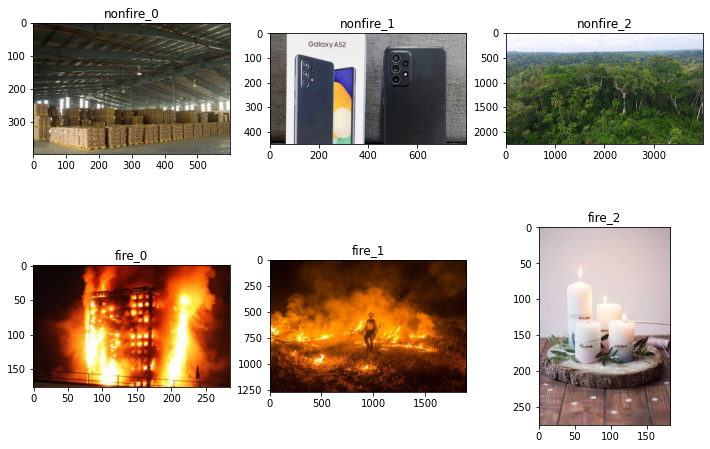

In [ ]:
# Hiển thị thử vài ảnh trong tập train

# Khai báo biến cần thiết
number_img_one_class = 3 # Số ảnh cần hiện trong 1 class
path_image_demo = [] # List các ảnh để hiện
classes = os.listdir(path_data_train) # List tên các class

# Đọc các path ảnh từ tập dữ liệu train
for sub_class in classes:
  path_class_demo = path_data_train + "/" + sub_class # Đường dẫn đến class
  files_name = sorted(os.listdir(path_class_demo))[:number_img_one_class] # List các tên file trong đường dẫn với số lượng
  for file_name in files_name:
    path_image_demo.append(path_data_train + "/" + sub_class + "/" + file_name) # Thêm vào đường dẫn vào path_image_demo


# Cấu hình hiện ảnh bằng matplotlib
cf_nrows = len(classes) # Số dòng output
cf_ncols = number_img_one_class # Số cột out put
cf_figsize = (cf_ncols * 4, cf_nrows * 4) # Kích thước output

# Đọc các ảnh từ path_image_demo và hiển thị bằng matplotlib
fig, axes = plt.subplots(nrows = cf_nrows, ncols = cf_ncols, figsize = cf_figsize) # Tạo matplotlib với cấu hình
for i in range(cf_nrows):
  for j in range(cf_ncols): 
    path_img = path_image_demo[i * cf_ncols + j] # Lấy path ảnh
    img = cv2.cvtColor(cv2.imread(path_img), cv2.COLOR_RGB2BGR) # Đọc ảnh chuyển về RGB
    axes[i,j].set_title(classes[i] + "_" + str(j)) # Đặt tiêu đề ảnh
    axes[i,j].imshow(img) # Show ảnh lên matplotlib

# Gọi hàm show
plt.show()

#####  **4.2.2.2. Tiền xử lý dữ liệu**

In [ ]:
# Chuyển các file JPG thành mảng fire và nonfire
train_fire = "/content/data/train/fire" # Đường dẫn tới thư mục chứa các hỉnh ảnh có cháy trong tập train
train_nonfire = "/content/data/train/nonfire" # Đường dẫn tới thư mục chứa các hỉnh ảnh không xuất hiện cháy trong tập train
test_fire = "/content/data/test/fire" # Đường dẫn tới thư mục chứa các hỉnh ảnh có cháy trong tập test
test_nonfire = "/content/data/test/nonfire"  # Đường dẫn tới thư mục chứa các hỉnh ảnh không xuất hiện cháy trong tập test
# Hàm tìm kiếm hình ảnh trong thư mục dựa trên phần mở rộng của file (.jpg)
def find_files(directory, pattern):
    for root, dirs, files in os.walk(directory):
        for basename in files:
            if fnmatch.fnmatch(basename, pattern):
                filename = os.path.join(root, basename)
                yield filename

In [ ]:
# Hàm tạo format dataset từ đường dẫn và tiền xử lý
def JPGtoArray(files,name,npy):
  _files=[] 
  for filename in find_files(files,"*jpg"): 
      file,ext = os.path.split(filename)
      img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB) #Đọc ảnh bằng thư viện CV2 và chuyển màu từ BGR sang RGB
      img = cv2.GaussianBlur(img, (5, 5), 0)
      img = img / 255
      img = cv2.resize(img, (224,224)) # Chuyển hình ảnh về kích thước 224x224
      data = np.array( img,np.uint8) # Chuyển hình ảnh thành ma trận
      data=data.sum(axis=2) # Giảm kích thước ma trận từ 3 chiều thành 2 chiều để train nhanh hơn
      np.save(name,data) # Lưu data thành về npy để xử lý nhanh hơn
      c = np.load(npy)
      _files.append(c) # Thêm phần tử vào mảng
  np.asarray(_files) 
  np.save(name+"1",_files) # Lưu mảng lại thành npy 

In [ ]:
# Chuyển các file jpg trong thư mục train_fire thành mảng fire_train.npy
JPGtoArray(train_fire,"fire_train","fire_train.npy")
# Chuyển các file jpg trong thư mục train_nonfire thành mảng nonfire_train.npy
JPGtoArray(train_nonfire,"nonfire_train","nonfire_train.npy")
# Chuyển các file jpg trong thư mục test_fire thành mảng fire_test.npy
JPGtoArray(test_fire,"fire_test","fire_test.npy")
# Chuyển các file jpg trong thư mục test_nonfire thành mảng nonfire_test.npy
JPGtoArray(test_nonfire,"nonfire_test","nonfire_test.npy")

#####  **4.2.2.3. Tạo format dataset**

In [ ]:
# Hàm tạo format dataset từ đường dẫn
def concatenate(x1,x2):
    x = np.concatenate((x1,x2),axis=0) # Nối 2 mảng
    z = np.zeros(x1.shape[0]) # Tạo mảng có n (số ảnh fire) số 0 cho fire 
    o = np.ones(x2.shape[0])  # Tạo mảng có m (số ảnh nonfire) số 1 cho nonfier
    y = np.concatenate((z,o),axis=0).reshape(x.shape[0],1) # Tạo vector y
    print("x shape",x.shape)
    print("y shape",y.shape)
    #Chuẩn hoá (Normalization)
    x = (x-np.min(x))/(np.max(x)-np.min(x))
    return x,y
fire_train = np.load("/content/fire_train1.npy")
nonfire_train =np.load("/content/nonfire_train1.npy")
fire_test = np.load("/content/fire_test1.npy")
nonfire_test = np.load("/content/nonfire_test1.npy")
x_train,y_train = concatenate(fire_train,nonfire_train)
x_test,y_test = concatenate(fire_test,nonfire_test)

x shape (3465, 224, 224)
y shape (3465, 1)
x shape (1155, 224, 224)
y shape (1155, 1)


#####  **4.2.2.4. Chuẩn hoá dữ liệu**

In [ ]:
# Chuyển mảng 3 chiều x thành 2 chiều để làm đầu vào cho model
number_of_train = x_train.shape[0]  # Số lượng ảnh trong tập train
number_of_test = x_test.shape[0]  # Số lượng ảnh trong tập test 
x_train_flat = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2]) # Chuyển mảng 3 chiều về 2 chiều
x_test_flat = x_test.reshape(number_of_test,x_test.shape[1]*x_test.shape[2]) # Chuyển mảng 3 chiều về 2 chiều
print("x train flat",x_train_flat.shape)
print("x test flat",x_test_flat.shape)

x train flat (3465, 50176)
x test flat (1155, 50176)


In [ ]:
# Chuyển đổi về đúng định dạng để sử dụng trong model
x_train = x_train_flat.T
y_train = y_train.T
x_test  = x_test_flat.T
y_test  = y_test.T

print("x train shape",x_train.shape)
print("x test shape",x_test.shape)
print("y train shape",y_train.shape)
print("y test shape",y_test.shape)
print("x train :",x_train)
print("y train: ",y_train)

x train shape (50176, 3465)
x test shape (50176, 1155)
y train shape (1, 3465)
y test shape (1, 1155)
x train : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y train:  [[0. 0. 0. ... 1. 1. 1.]]


#### **4.2.3. Train bằng ảnh sau khi đã tiền xử lý**

##### **4.2.3.1. Training**

In [ ]:
# Thêm thư viện
from sklearn import linear_model 
# Tạo model Logistic Regression
lr = linear_model.LogisticRegression(random_state =42,max_iter= 15000) 
#Tiến hành training 
lr.fit(x_train.T, y_train.T) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=15000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Lưu model đã train
from sklearn.externals import joblib
joblib_file = "LogisticRegression.pkl"  
joblib.dump(lr, joblib_file)

['LogisticRegression.pkl']

##### **4.2.3.2. Kết quả model Logistic Regression sau khi train"**


In [ ]:
# Tải lên model
lr_model = joblib.load(joblib_file)
 
# Kiểm thử model
lr_model.score(x_test.T, y_test.T)

0.6796536796536796

In [ ]:
#Hàm show kết quả
from sklearn.metrics import classification_report
def showResult(model,X,y):
  y_pred = model.predict(X)
  threshold = 1
  y_pred = y_pred.reshape(-1)
  y_pred[y_pred < threshold] = 0
  y_pred[y_pred >= threshold] = 1
  y_pred = y_pred.astype('int')
  print(classification_report(y, y_pred))

In [ ]:
# Kết quả model
showResult(lr_model,x_test.T,y_test.T)
showResult(lr_model,x_train.T,y_train.T)

              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79       720
         1.0       0.77      0.21      0.33       435

    accuracy                           0.68      1155
   macro avg       0.72      0.59      0.56      1155
weighted avg       0.71      0.68      0.62      1155

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.85      2160
         1.0       1.00      0.43      0.61      1305

    accuracy                           0.79      3465
   macro avg       0.87      0.72      0.73      3465
weighted avg       0.84      0.79      0.76      3465

